In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

HSC_color = 'grey'
HSC_TNG50_color = 'bisque'
HSC_TNG100_color = 'aqua'
TNG50_color = 'orange'
TNG100_color = 'blue'

df_unmatched_TNG100 = pd.read_csv("../../dataset_raw/HSC_TNG100/label.csv")
df_unmatched_TNG50 = pd.read_csv("../../dataset_raw/HSC_TNG50/label.csv")
df_unmatched_HSC = pd.read_csv("../../dataset_raw/HSC/label.csv")

df = pd.read_csv("../../dataset/m_train.csv")
HSC_mask = df["dataset"] == 'HSC'
HSC_TNG50_mask = np.logical_and(HSC_mask, df["matched_set"] == 'HSC_TNG50')
HSC_TNG100_mask = np.logical_and(HSC_mask, df["matched_set"] == 'HSC_TNG100')
TNG50_mask = df["dataset"] == 'HSC_TNG50'
TNG100_mask = df["dataset"] == 'HSC_TNG100'
df_matched_HSC= df[HSC_mask]
df_matched_HSC_TNG50 = df[HSC_TNG50_mask]
df_matched_HSC_TNG100 = df[HSC_TNG100_mask]
df_matched_TNG50 = df[TNG50_mask]
df_matched_TNG100 = df[TNG100_mask]

print(len(df_matched_HSC))
print(len(df_matched_HSC_TNG50))
print(len(df_matched_HSC_TNG100))
print(len(df_matched_TNG50))
print(len(df_matched_TNG100))

124313
21045
103268
21221
103138


In [7]:
HSC_label = ["photoz", "i_cmodel_mag_ge", "petro_90_light"]
TNG_label = ['z', 'i_band_mag_dust_apparent', 'petro_90_light']
label = ['Redshift', 'Apparent I-Band Magnitude [mag]', 'Petrosian $90 \%$ radius [pixel]']
limits = [[0.09, 0.41],[14,22],[0,100]]

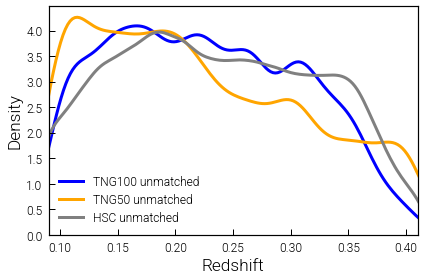

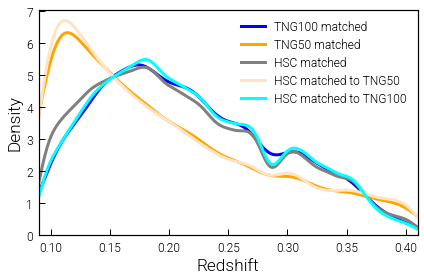

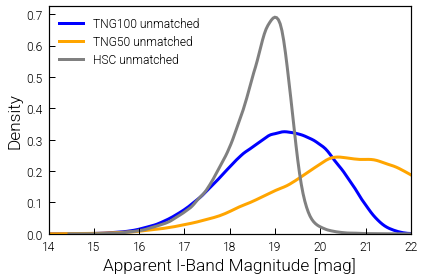

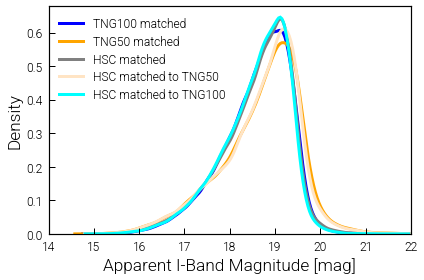

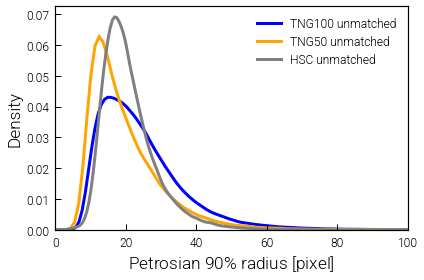

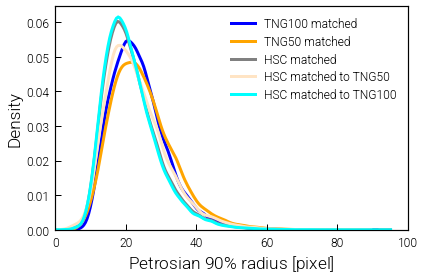

In [8]:
for hl, tl, l, lim in zip(HSC_label, TNG_label, label, limits):
    BINS = 50
    LINEWIDTH = 3
    
    if tl == 'z':
        sns.kdeplot(x=df_unmatched_TNG100[tl], color=TNG100_color, bw_method = 0.2, linewidth=LINEWIDTH)
        sns.kdeplot(x=df_unmatched_TNG50[tl], color=TNG50_color, bw_method = 0.2, linewidth=LINEWIDTH)
    else:
        sns.kdeplot(x=df_unmatched_TNG100[tl], color=TNG100_color, linewidth=LINEWIDTH)
        sns.kdeplot(x=df_unmatched_TNG50[tl], color=TNG50_color, linewidth=LINEWIDTH)
    
    sns.kdeplot(x=df_unmatched_HSC[hl], color=HSC_color, linewidth=LINEWIDTH)
    plt.xlabel(l)
    plt.xlim(lim)
    plt.legend(labels=['TNG100 unmatched', 'TNG50 unmatched', 'HSC unmatched'])
    plt.savefig(f'../../temp/unmatched_{hl}.pdf')
    plt.show()
    
    if tl == 'z':
        sns.kdeplot(x=df_matched_TNG100[tl], color=TNG100_color, bw_method = 0.2, linewidth=LINEWIDTH)
        sns.kdeplot(x=df_matched_TNG50[tl], color=TNG50_color, bw_method = 0.2, linewidth=LINEWIDTH)
    else:
        sns.kdeplot(x=df_matched_TNG100[tl], color=TNG100_color, linewidth=LINEWIDTH)
        sns.kdeplot(x=df_matched_TNG50[tl], color=TNG50_color, linewidth=LINEWIDTH)
        
    sns.kdeplot(x=df_matched_HSC[hl], color=HSC_color, linewidth=LINEWIDTH)
    sns.kdeplot(x=df_matched_HSC_TNG50[hl], color=HSC_TNG50_color, linewidth=LINEWIDTH)
    sns.kdeplot(x=df_matched_HSC_TNG100[hl], color=HSC_TNG100_color, linewidth=LINEWIDTH)
    plt.xlabel(l)
    plt.xlim(lim)
    plt.legend(labels=['TNG100 matched', 'TNG50 matched', 'HSC matched', 'HSC matched to TNG50', 'HSC matched to TNG100'])
    plt.savefig(f'../../temp/matched_{hl}.pdf')
    plt.show()



/u/leisert/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


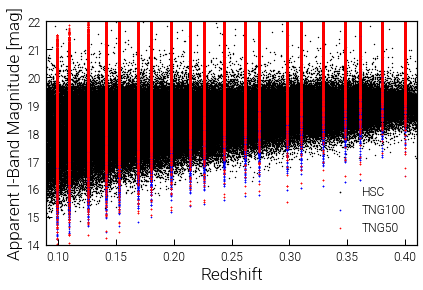

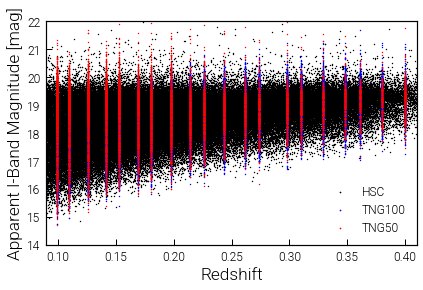

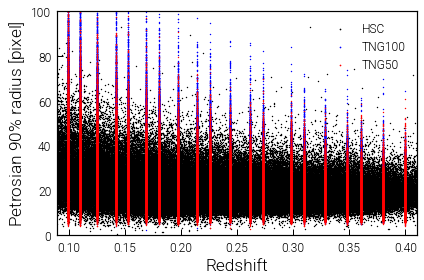

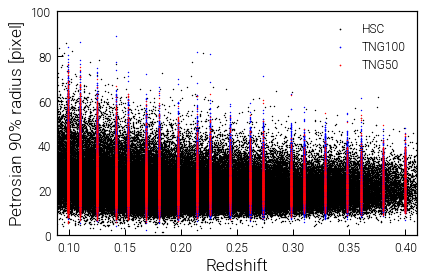

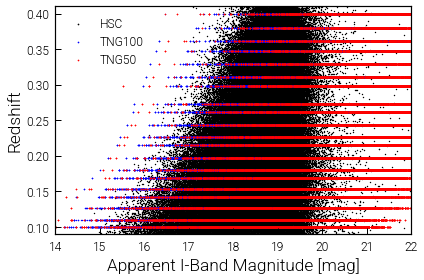

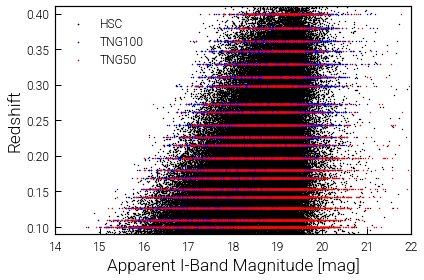

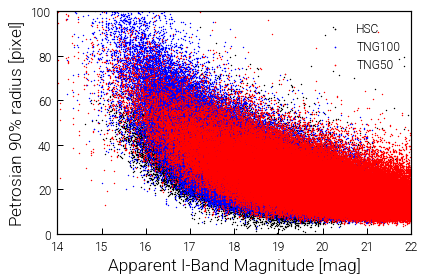

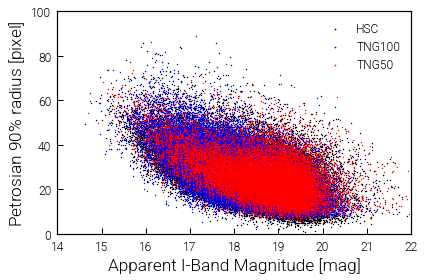

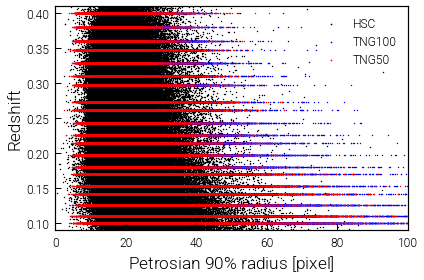

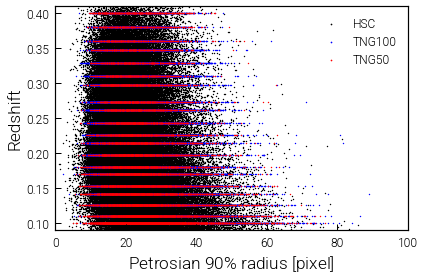

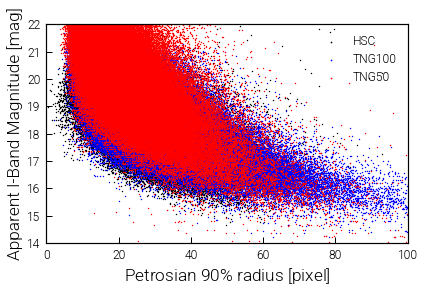

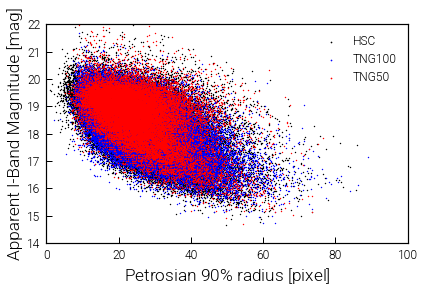

In [6]:
for xhl, xtl, xl, xlim in zip(HSC_label, TNG_label, label, limits):
    for yhl, ytl, yl, ylim in zip(HSC_label, TNG_label, label, limits):
        if xl == yl:
            continue
        
        plt.scatter(df_unmatched_HSC[xhl], df_unmatched_HSC[yhl], label="HSC", s=2, color='k')
        plt.scatter(df_unmatched_TNG100[xtl], df_unmatched_TNG100[ytl], label="TNG100", s=2, color='b')
        plt.scatter(df_unmatched_TNG50[xtl], df_unmatched_TNG50[ytl], label="TNG50", s=2, color='r')
        plt.xlabel(xl)
        plt.ylabel(yl)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.show()
        
        plt.scatter(df_matched_HSC[xhl], df_matched_HSC[yhl], label="HSC", s=2, color='k')
        plt.scatter(df_matched_TNG100[xtl], df_matched_TNG100[ytl], label="TNG100", s=2, color='b')
        plt.scatter(df_matched_TNG50[xtl], df_matched_TNG50[ytl], label="TNG50", s=2, color='r')
        plt.xlabel(xl)
        plt.ylabel(yl)
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.legend()
        plt.show()